# CNN Sign Language MNIST Model

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
    with open(filename) as training_file:
      
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels
      
path_sign_mnist_train = "C:/Users/Dell/Desktop/ML codes/Neural Network codes/Mnist Symbols/sign_mnist_train.csv"
path_sign_mnist_test = "C:/Users/Dell/Desktop/ML codes/Neural Network codes/Mnist Symbols/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(train_gen,
    epochs=14,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels, verbose=0)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 429 steps, validate for 113 steps
Epoch 1/14
429/429 [==============================] - 9s 21ms/step - loss: 2.7946 - accuracy: 0.1539 - val_loss: 2.2356 - val_accuracy: 0.2762
Epoch 2/14
429/429 [==============================] - 9s 21ms/step - loss: 2.1455 - accuracy: 0.3225 - val_loss: 1.5013 - val_accuracy: 0.4699
Epoch 3/14
429/429 [==============================] - 10s 23ms/step - loss: 1.7429 - accuracy: 0.4401 - val_loss: 1.1150 - val_accuracy: 0.6106
Epoch 4/14
429/429 [==============================] - 11s 24ms/step - loss: 1.5024 - accuracy: 0.5139 - val_loss: 0.9185 - val_accuracy: 0.6828
Epoch 5/14
429/429 [==============================] - 11s 25ms/step - loss: 1.3187 - accuracy: 0.5700 - val_loss: 0.8913 - val_accuracy: 0.6587
Epoch 6/14
429/429 [==============================] - 11s 25ms/step - loss: 1.1776 - accuracy: 0.6163 - val_loss: 0.6976 - val_accuracy: 0.7579
Epoch 7/14
429/429 [========================

[107.46693401634526, 0.6993865]

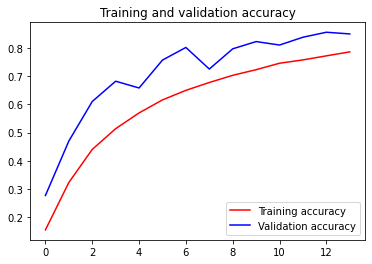

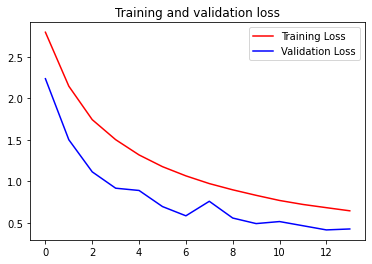

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.save('sign_model.h5')